# 2D Delay and Sum Simulation

Performs basic beamforming operations for a 2-Dimensional, linear array using a simple delay-and-sum beamformer. Intended as a test of the capability of pyroomacoustics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra

### Vary Source Frequency

The frequency of the source has great impact on the effectiveness (directivity) of a fixed narrowband beamformer. Demonstrate this by varying the frequency and plotting the beam pattern.

Text(0.5, 1.0, 'Effect of Source Frequency')

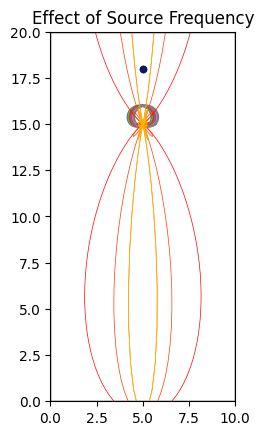

In [2]:
# Create a shoebox room of similar size to the theatre
room_len = 10
room_wid = 20
room1 = pra.ShoeBox([room_len, room_wid])

# Add a source on stage
room1.add_source([5, 18])

# Set up cardioid microhpone pattern
pattern = pra.DirectivityPattern.CARDIOID
orientation = pra.DirectionVector(azimuth=90, colatitude=None, degrees=True)
directivity = pra.CardioidFamily(orientation=orientation, pattern_enum=pattern)

# Create a linear array beamformer with 8 cardioid microphones
# with angle 0 degrees and inter mic distance 5 cm
R = pra.linear_2D_array(center=[5, 15], M=8, phi=0, d=0.05)
# mic_array = pra.beamforming.MicrophoneArray(R, room1.fs, directivity)
mic_array = pra.Beamformer(R, room1.fs)
mic_array.set_directivity(directivities=directivity)
room1.add_microphone_array(mic_array)

# Now compute the delay and sum weights for the beamformer
room1.mic_array.rake_delay_and_sum_weights(room1.sources[0][:1])

# plot the room and resulting beamformer
room1.plot(freq=[1000, 2000, 4000, 8000], img_order=0)
plt.title('Effect of Source Frequency')

### Vary Microphone Separation

One way to account for the frequency of a signal is to vary the separation of the microphones, with the optimal separation for a narrowband beamformer being exactly half of the source wavelength. Demonstrate this effect by plotting the beam pattern for different separations.

It is clear from the plots below that when the separation is too small, the main lobe becomes wider and less directional, but when the separation is too large, the size of the side lobes begin to become more of an issue.

Text(0.5, 0.98, 'Effect of Microphone Separation')

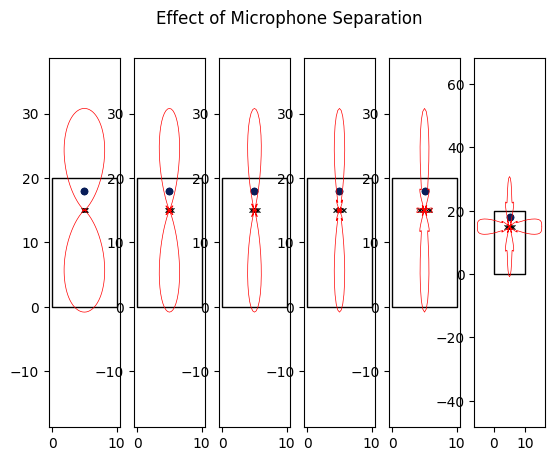

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
# Simulate arrays with varying microphone separation
separations = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
rooms = [pra.ShoeBox([10, 20]) for i in range(len(separations))]
fig, axs = plt.subplots(1, len(separations))

for i in range(len(rooms)):
    rooms[i].add_source([5, 18])

    R = pra.linear_2D_array(center=[5, 15], M=8, phi=0, d=separations[i])
    rooms[i].add_microphone_array(pra.Beamformer(R, rooms[i].fs))

    rooms[i].mic_array.rake_delay_and_sum_weights(rooms[i].sources[0][:1])

    rooms[i].plot(freq=1000, img_order=0, ax=axs[i])
    axs[i].axis('equal')
    axs[i].set(ylim=(0, room_wid))

# Format plot
fig.suptitle('Effect of Microphone Separation')

### Vary Source Position

Simulate the beam steering by moving the source around the stage, and observe how the beam pattern changes. For large angles, there appears to be a spatial aliasing problem.

Text(0.5, 0.98, 'Effect of Source Position')

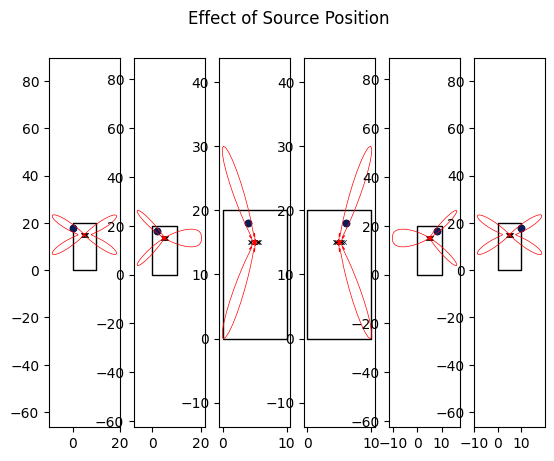

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
# Simulate a moving source around the stage by trying different positions
source_x = [i for i in range(0, 11, 2)] # x coordinates of source (varying)
rooms = [pra.ShoeBox([10, 20]) for i in range(len(source_x))]
fig2, axs2 = plt.subplots(1, len(source_x))

for i in range(len(rooms)):
    rooms[i].add_source([source_x[i], 18])

    R = pra.linear_2D_array(center=[5, 15], M=8, phi=0, d=0.2)
    rooms[i].add_microphone_array(pra.Beamformer(R, rooms[i].fs))

    rooms[i].mic_array.rake_delay_and_sum_weights(rooms[i].sources[0][:1])

    rooms[i].plot(freq=1000, img_order=0, ax=axs2[i])
    axs2[i].axis('equal')

# Format plot
fig2.suptitle('Effect of Source Position')